<a href="https://colab.research.google.com/github/JBank25/AccelerometerMisc/blob/main/Multicat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook       
fastbook.setup_book() 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#hide
from fastbook import *


In [3]:
# Multi-label classification refers to the problem of identifying the categories of objects in images 
# that may not contain exactly one type of object.

# For this dive into multi-label classification we'll use the PASCAL dataset
from fastai.vision.all import *
path = untar_data(URLs.PASCAL_2007)

In [4]:
print(path.ls())
print(path)

[Path('/root/.fastai/data/pascal_2007/train.json'), Path('/root/.fastai/data/pascal_2007/valid.json'), Path('/root/.fastai/data/pascal_2007/test.json'), Path('/root/.fastai/data/pascal_2007/train'), Path('/root/.fastai/data/pascal_2007/train.csv'), Path('/root/.fastai/data/pascal_2007/test.csv'), Path('/root/.fastai/data/pascal_2007/segmentation'), Path('/root/.fastai/data/pascal_2007/test')]
/root/.fastai/data/pascal_2007


In [5]:
!ls

gdrive	sample_data


In [6]:
# This dataset is not structured by filename or folder. Uses a CSV file telling us what labels to use
# for each image
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [7]:
# PyTorch has two main classes we use for bringing training and validation sets together. These are
# Dataset - collection that returns a tuple of your independent and dependent variable for single item
# DataLoader - iterator that provides a stream of mini-batches, each mini-bartch is a tuple of a batch 
# of indep. variables and a batch of dependent varaibles.

# FastAI provides two classes for bringing training and validation sets together:
# Datasets - object containing a training PyTorch Dataset and PyTorch validation Dataset
# DataLoaders - object that contains a training PyTorch DataLoader and validation DataLoader

# We'll start with a DataBlock in our process here

dblock = DataBlock()

In [8]:
# Datasets can be created from this DataBlock object using a dataframe here
dsets = dblock.datasets(df)

In [9]:
len(dsets.train),len(dsets.valid)

(4009, 1002)

In [10]:
x,y = dsets.train[0]
print(f'x: {x}\n')
print(f'y: {y}\n')
print('Datablock we used to create the Datasets assumes we give it an input and target')
print('Appropriate fields must be grabbed from DataFrame to avoid the redundany x and y as we have here')

x: fname       008663.jpg
labels      car person
is_valid         False
Name: 4346, dtype: object

y: fname       008663.jpg
labels      car person
is_valid         False
Name: 4346, dtype: object

Datablock we used to create the Datasets assumes we give it an input and target
Appropriate fields must be grabbed from DataFrame to avoid the redundany x and y as we have here


In [11]:
#provide lambda functions to grab the input and target from the dataframe. 
dblock = DataBlock(get_x = lambda r: r['fname'], get_y = lambda r: r['labels'])
dsets = dblock.datasets(df)
dsets.train[0]

('005620.jpg', 'aeroplane')

In [12]:
#Explicit implementation of the above rather than using lambda functions
def get_x(r): return r['fname']
def get_y(r): return r['labels']
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

('002549.jpg', 'tvmonitor')

In [13]:
# The independent variable will need a full path to display it as an image.
# The dependent varaible will need to be split on the space character
def get_x(r): return (path/'train'/r['fname'])
def get_y(r): return r['labels'].split(' ')
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(Path('/root/.fastai/data/pascal_2007/train/002844.jpg'), ['train'])

In [14]:
# To open the image and do conversions to tensors we will need to use some transforms. Block types will
# provide this to us. 
# ImageBlock will work fine bc we have a valid path to a valid image
# The CategoryBlock which we were previously using will not work however. We need a block that provides
# multiple categories for each item, thus we use a MultiCategoryBlock

dblock = DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
                   get_x=get_x,
                   get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x375,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [15]:
# Above we finally have a PILImage like we want and a multicategroy tensor we can use
print(type(dsets.train[0]))

<class 'tuple'>


<Axes: >

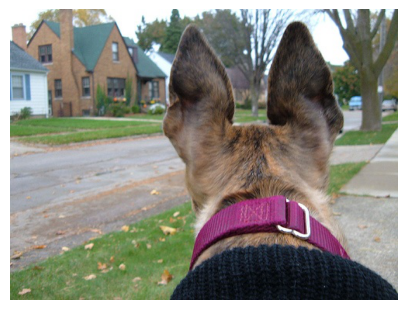

In [16]:
show_image((dsets.train[0])[0])

In [17]:
# Looking at the TensorMultiCategory we can see that the tensor is different from the single category
# implementation we previously had. With the MultiCategory we can see a 1 in every position that 
# fits. (MultiCategory has 1 >= label and thus will have 1 >= one in the tensor)
# A multi-hot vector, name from here: https://developers.google.com/machine-learning/crash-course/representation/feature-engineering
print(dsets.train[1])

idxs = torch.where(dsets.train[1][1] == 1.)[0]  #Gives us a tensor containing index # of every 1 we have
print(idxs)
print(dsets.train.vocab[idxs])
print(dsets.train.vocab)

(PILImage mode=RGB size=500x333, TensorMultiCategory([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.]))
TensorMultiCategory([ 4, 14, 19])
['bottle', 'person', 'tvmonitor']
['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']


In [18]:
# We have ignored the is_valid column thus far. The DataBlock has been using a random split by default
# as a result. We need a splitter function to pass to the splitter element of our DataBlock to create a 
# predefined split.
def splitter(df):
  train = df.index[~df['is_valid']].tolist()
  valid = df.index[~df['is_valid']].tolist()
  return train,valid 
dblock = DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x,
                   get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [19]:
# A DataLoaders object collates items from a Dataset into a mini-batch. This is a tuple of tensors where each
# tensor stacks the items ferom that location in the Dataset item

# The last step we need to take is to ensure we can create our DataLoaders is to ensure that every item is
# of the same size. RandomResizedCrop will allow us to do this

dblock = DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x,
                   get_y = get_y,
                   item_tfms=RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(df)

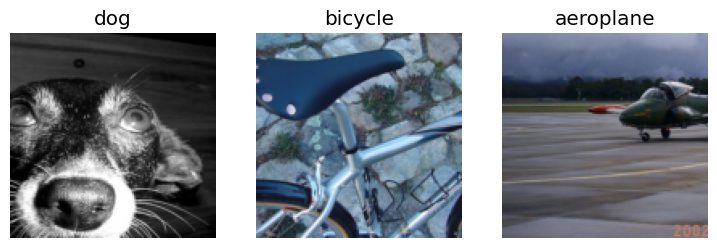

In [20]:
dls.show_batch(nrows=1, ncols=3)

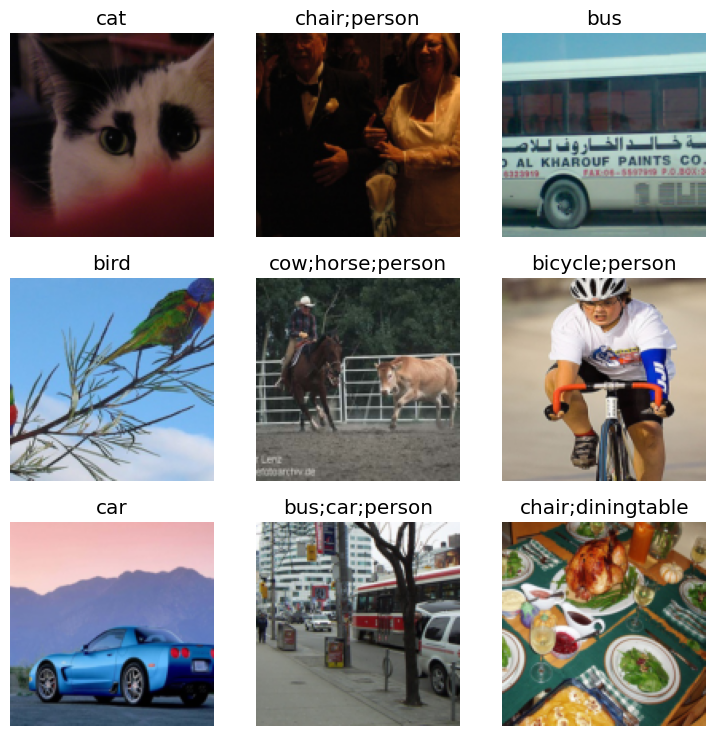

In [21]:
dls.show_batch(nrows=3, ncols=3)

In [22]:
# Remember that if anything goes wrong when you create your DataLoaders from your DataBlock, or if you want to 
# view exactly what happens with your DataBlock, you can use the summary method we presented in the last 
# chapter.

In [23]:
# We can now create a Learner object. Recall this has 4 main things: model, DataLoaders 
# object, an optimizer, and a loss function. We have our DataLoaders we can leverage
# resnet from fastai and use stochastic gradient descent for our optimizer. This allows
# us to focus on a suitable loss function. 

learn = vision_learner(dls, resnet18) #creat our vision learner

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 38.0MB/s]


In [24]:
x,y = to_cpu(dls.train.one_batch()) # get our indep. variable as mini-batch
activs = learn.model(x) # we can call our model using the indep. variable
activs.shape  # batch size is 64, 20 categories are being calculated for each

torch.Size([64, 20])

In [25]:
type(x)

fastai.torch_core.TensorImage

In [26]:
# The tensor is not yet scaled between 0 and 1. We can do this using the sigmoid
activs[0]

TensorImage([-2.0124,  4.7439,  1.4852,  7.3712, -1.4951,  1.7296, -1.4407,  3.3942,  1.2674,  2.5503,  2.2129,  2.3166, -0.4596,  0.8351,  0.2776, -4.4581, -1.1463,  4.0940, -4.0140,  2.3383],
            grad_fn=<AliasBackward0>)

In [27]:
sum(activs[0])

TensorImage(19.5902, grad_fn=<AliasBackward0>)

In [28]:
def binary_cross_entropy(inputs, targets):
  inputs = inputs.sigmoid()
  return -torch.where(targets==1, inputs, 1-inputs).log().mean()

In [29]:
activs_sigmoid = activs[0].sigmoid()
activs_sigmoid

TensorImage([0.1179, 0.9914, 0.8154, 0.9994, 0.1832, 0.8494, 0.1914, 0.9675, 0.7803, 0.9276, 0.9014, 0.9102, 0.3871, 0.6974, 0.5690, 0.0115, 0.2412, 0.9836, 0.0177, 0.9120], grad_fn=<AliasBackward0>)

In [30]:
sum(activs_sigmoid)

TensorImage(12.4545, grad_fn=<AliasBackward0>)

In [44]:
# THIS CELL IS BROKEN NOT SURE WHY

# loss_func = nn.BCEWithLogitsLoss()
# loss = loss_func(activs, y)
# loss

In [45]:
# Previously when classifying we had only a single label, thus we could use the accuracy
# metric. This compared our outputs to our targets.

def accuracy(inp, targ, axis=-1):
    "Compute accuracy with `targ` when `pred` is bs * n_classes"
    pred = inp.argmax(dim=axis)
    return (pred == targ).float().mean()

# This was when we could just select the predicted class with the highest activation. This
# does not work here bc we could have more than one prediction for a single image. After
# applying sigmoid to normalize we must then pick a threshold that we will say is the point
# at which an activation is a 1 or a 0

In [54]:
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    if sigmoid: inp = inp.sigmoid()   # normalize activations between 0 and 1
    print(inp)
    return ((inp>thresh)==targ.bool()).float().mean() # Return 1 when completely accurate

input_tens = tensor([-1., 0.2, 0.5, -0.4, 0.7])
targ = tensor([0., 1.0, 1.0, 0., 1.])
print(f'Accuracy: {accuracy_multi(input_tens, targ)}')
input_tens = tensor([-1., 0.2, 0.5, -0.4, -0.7])
print(f'Accuracy: {accuracy_multi(input_tens, targ)}')
input_tens = tensor([-1., 0.2, -0.5, -0.4, -0.7])
print(f'Accuracy: {accuracy_multi(input_tens, targ)}')

tensor([0.2689, 0.5498, 0.6225, 0.4013, 0.6682])
Accuracy: 1.0
tensor([0.2689, 0.5498, 0.6225, 0.4013, 0.3318])
Accuracy: 0.800000011920929
tensor([0.2689, 0.5498, 0.3775, 0.4013, 0.3318])
Accuracy: 0.6000000238418579


In [57]:
learn = vision_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.946968,0.672712,0.241843,00:41
1,0.827496,0.544583,0.283307,00:35
2,0.607048,0.189402,0.820312,00:34
3,0.362027,0.101818,0.949780,00:34


tensor([[0.5614, 0.0354, 0.3190,  ..., 0.5308, 0.3780, 0.2780],
        [0.1801, 0.5647, 0.1353,  ..., 0.5667, 0.3410, 0.0597],
        [0.2091, 0.9904, 0.5371,  ..., 0.1560, 0.2636, 0.1044],
        ...,
        [0.7116, 0.7886, 0.1650,  ..., 0.8826, 0.5914, 0.9616],
        [0.5132, 0.4281, 0.3313,  ..., 0.5255, 0.2789, 0.4285],
        [0.4260, 0.2906, 0.1771,  ..., 0.5324, 0.8365, 0.9804]], device='cuda:0')
tensor([[0.3769, 0.4601, 0.4255,  ..., 0.4197, 0.4685, 0.5179],
        [0.4807, 0.3387, 0.1525,  ..., 0.5077, 0.2193, 0.5109],
        [0.2670, 0.1892, 0.7487,  ..., 0.2244, 0.8089, 0.2515],
        ...,
        [0.5869, 0.7685, 0.3737,  ..., 0.6423, 0.3044, 0.5753],
        [0.9041, 0.3085, 0.6255,  ..., 0.2912, 0.3996, 0.2364],
        [0.3733, 0.4924, 0.4648,  ..., 0.1990, 0.5549, 0.4817]], device='cuda:0')
tensor([[0.5106, 0.1309, 0.8116,  ..., 0.2292, 0.7648, 0.2779],
        [0.0662, 0.5493, 0.3768,  ..., 0.1582, 0.4510, 0.3886],
        [0.2618, 0.8897, 0.0461,  ..., 0.9

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.134988,0.085199,0.959236,00:39
1,0.118046,0.062835,0.972071,00:35
2,0.098972,0.055745,0.975170,00:34


tensor([[7.0344e-04, 3.8679e-03, 1.1423e-03,  ..., 3.1276e-03, 9.3275e-03, 2.7187e-03],
        [8.5191e-04, 1.1794e-02, 8.3307e-03,  ..., 7.0068e-03, 2.8360e-03, 3.0119e-03],
        [1.1835e-04, 9.8050e-01, 1.5973e-03,  ..., 4.8184e-04, 1.8224e-04, 4.4180e-04],
        ...,
        [3.0904e-03, 1.9229e-02, 7.9062e-04,  ..., 2.2401e-02, 3.8811e-02, 1.2276e-02],
        [1.2879e-03, 1.6837e-02, 2.8687e-03,  ..., 4.8855e-03, 2.8673e-03, 3.2910e-03],
        [1.7898e-03, 3.5667e-03, 2.1533e-03,  ..., 5.0208e-02, 1.8982e-02, 4.6386e-01]], device='cuda:0')
tensor([[3.1779e-03, 2.5992e-03, 3.2897e-03,  ..., 4.7365e-03, 3.3571e-03, 4.8523e-02],
        [4.0604e-03, 5.6048e-03, 2.8386e-03,  ..., 3.8972e-02, 3.7848e-03, 1.8797e-02],
        [7.8789e-03, 6.4730e-02, 1.1395e-01,  ..., 7.8185e-03, 3.3238e-02, 2.0633e-02],
        ...,
        [1.3904e-03, 9.6631e-01, 2.7098e-03,  ..., 3.9240e-03, 9.1039e-04, 8.1930e-04],
        [2.6850e-03, 4.2690e-02, 1.1230e-01,  ..., 3.5709e-01, 5.2444e-03, 1

In [62]:
# By the third epoch we have a valid loss and accuracy of 0.055745 and 0.975170	
# threshold picking will influence the performance of our model in classifying.
# Too low will be failing to select correctly labeled objects
# We can test this quickly by changing our metric and calling validate which will  
# return the validation and loss metrics

# [0.055745482444763184,0.9568172693252563] <- accuracy taking a hit w low thresh
learn.metrics = partial(accuracy_multi, thresh=0.1)
learn.validate()

# A higher threshold will cause the model to only select objects it is extremely 
# confident in
# (#2) [0.055745482444763184,0.9711117744445801]
learn.metrics = partial(accuracy_multi, thresh=0.8)
learn.validate()

# (#2) [0.055745482444763184,0.9213314652442932]
learn.metrics = partial(accuracy_multi, thresh=0.99999)
learn.validate()

tensor([[1.7261e-04, 2.5103e-03, 2.9627e-04,  ..., 9.7011e-03, 5.8513e-04, 2.0578e-03],
        [1.2152e-04, 1.4934e-03, 9.7427e-05,  ..., 1.1796e-03, 2.2470e-04, 2.6632e-04],
        [2.5944e-04, 9.7654e-01, 1.2126e-03,  ..., 6.7861e-04, 9.7986e-04, 1.4203e-03],
        ...,
        [3.1265e-03, 7.9269e-02, 1.2759e-03,  ..., 1.4816e-02, 1.5112e-02, 1.0719e-02],
        [6.9584e-04, 2.3603e-02, 1.8429e-03,  ..., 6.7102e-03, 1.8097e-03, 3.7350e-03],
        [1.1194e-03, 3.4100e-03, 2.5748e-03,  ..., 9.4103e-02, 2.3811e-03, 6.2125e-01]], device='cuda:0')
tensor([[1.4524e-03, 2.9199e-03, 1.4949e-03,  ..., 2.3870e-02, 1.2273e-03, 1.8038e-01],
        [2.1785e-03, 7.6843e-03, 3.5140e-03,  ..., 7.0655e-02, 5.8106e-03, 2.8786e-02],
        [5.6898e-04, 1.9711e-03, 3.6785e-04,  ..., 7.3287e-04, 1.0634e-03, 6.2596e-04],
        ...,
        [1.4697e-03, 8.6689e-01, 1.0572e-03,  ..., 3.4310e-03, 2.1573e-03, 4.0242e-03],
        [5.3382e-05, 2.3831e-03, 4.2527e-04,  ..., 2.8671e-03, 2.1834e-04, 2

tensor([[1.7261e-04, 2.5103e-03, 2.9627e-04,  ..., 9.7011e-03, 5.8513e-04, 2.0578e-03],
        [1.2152e-04, 1.4934e-03, 9.7427e-05,  ..., 1.1796e-03, 2.2470e-04, 2.6632e-04],
        [2.5944e-04, 9.7654e-01, 1.2126e-03,  ..., 6.7861e-04, 9.7986e-04, 1.4203e-03],
        ...,
        [3.1265e-03, 7.9269e-02, 1.2759e-03,  ..., 1.4816e-02, 1.5112e-02, 1.0719e-02],
        [6.9584e-04, 2.3603e-02, 1.8429e-03,  ..., 6.7102e-03, 1.8097e-03, 3.7350e-03],
        [1.1194e-03, 3.4100e-03, 2.5748e-03,  ..., 9.4103e-02, 2.3811e-03, 6.2125e-01]], device='cuda:0')
tensor([[1.4524e-03, 2.9199e-03, 1.4949e-03,  ..., 2.3870e-02, 1.2273e-03, 1.8038e-01],
        [2.1785e-03, 7.6843e-03, 3.5140e-03,  ..., 7.0655e-02, 5.8106e-03, 2.8786e-02],
        [5.6898e-04, 1.9711e-03, 3.6785e-04,  ..., 7.3287e-04, 1.0634e-03, 6.2596e-04],
        ...,
        [1.4697e-03, 8.6689e-01, 1.0572e-03,  ..., 3.4310e-03, 2.1573e-03, 4.0242e-03],
        [5.3382e-05, 2.3831e-03, 4.2527e-04,  ..., 2.8671e-03, 2.1834e-04, 2

tensor([[1.7261e-04, 2.5103e-03, 2.9627e-04,  ..., 9.7011e-03, 5.8513e-04, 2.0578e-03],
        [1.2152e-04, 1.4934e-03, 9.7427e-05,  ..., 1.1796e-03, 2.2470e-04, 2.6632e-04],
        [2.5944e-04, 9.7654e-01, 1.2126e-03,  ..., 6.7861e-04, 9.7986e-04, 1.4203e-03],
        ...,
        [3.1265e-03, 7.9269e-02, 1.2759e-03,  ..., 1.4816e-02, 1.5112e-02, 1.0719e-02],
        [6.9584e-04, 2.3603e-02, 1.8429e-03,  ..., 6.7102e-03, 1.8097e-03, 3.7350e-03],
        [1.1194e-03, 3.4100e-03, 2.5748e-03,  ..., 9.4103e-02, 2.3811e-03, 6.2125e-01]], device='cuda:0')
tensor([[1.4524e-03, 2.9199e-03, 1.4949e-03,  ..., 2.3870e-02, 1.2273e-03, 1.8038e-01],
        [2.1785e-03, 7.6843e-03, 3.5140e-03,  ..., 7.0655e-02, 5.8106e-03, 2.8786e-02],
        [5.6898e-04, 1.9711e-03, 3.6785e-04,  ..., 7.3287e-04, 1.0634e-03, 6.2596e-04],
        ...,
        [1.4697e-03, 8.6689e-01, 1.0572e-03,  ..., 3.4310e-03, 2.1573e-03, 4.0242e-03],
        [5.3382e-05, 2.3831e-03, 4.2527e-04,  ..., 2.8671e-03, 2.1834e-04, 2

(#2) [0.055745482444763184,0.9213314652442932]

In [63]:
!nvidia-smi

Sun Jun  4 17:57:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    39W / 300W |   3648MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

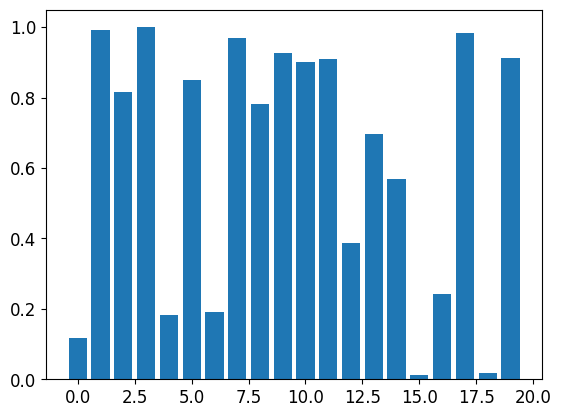

In [31]:
import matplotlib.pyplot as plt

# Convert the tensor to a numpy array
array_sigmoid = activs_sigmoid.detach().numpy()

# Create an array with the length of our array for the x-axis
x = range(len(array_sigmoid))

# Create a bar plot
plt.bar(x, array_sigmoid)

# Show the plot
plt.show()


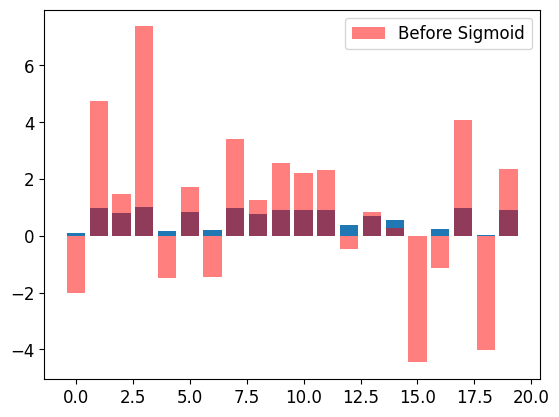

In [32]:
# Convert the tensor to a numpy array
array = activs[0].detach().numpy()

# Create an array with the length of our array for the x-axis
x = range(len(array))

# Create a bar plot
plt.bar(x, array_sigmoid)
plt.bar(x, array, color = 'red', alpha=0.5, label='Before Sigmoid')

plt.legend()
# Show the plot
plt.show()


In [33]:
# MORE ON SIGMOIDS HERE!!!

# Notice above the activations before the sigmoid function is applied. Sigmoid functions 
# have the property that they map the entire number line between (-1,1). We can use
# this sigmoid to convert a real value into a probability. Putting this sigmoid at the
# end of a neural net (the output layer) can convert the models activations to a 
# probability score which can be easier to interpret and work with. 

In [34]:
# PyTorch provides functions we can use for this multicategory classification problem 
# as softmax and the nnloss we previously say for the single category classification come
# up short. 

In [35]:
# QUICK RECAP ON CROSS ENTROPY LOSS AND CLASSIFICATION FROM CHAPTER 5

# The softmax function from the previous chapter (chapter 5 pet breeds) tends to push one
# actication to be much higher than others due to use of the exponential. In the 
# context of our multicategory classification this does not seem like a good idea as we
# may have MULTIPLE objects we are wanting to say are present in an image. The
# softmax function ALSO normalizes the input to make it sum to 1. We
# may want the sum to be less than 1 if we do not think ANY of the categories are 
# present in an image. 
# def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True)


# nll_loss is the negative log likelihood THIS IS ACTUALLY STILL UNCLEAR TO ME, NEED TO
# SEE HOW THIS WORKS MORE THOROUGHLY
# https://medium.com/deeplearningmadeeasy/negative-log-likelihood-6bd79b55d8b6#:~:text=It's%20a%20cost%20function%20that,performing%2C%20the%20lower%20the%20better.